## Iris Flower Classification

## Dataset: "Iris.csv"

importing necessary libraries

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Loading Dataset

In [47]:
df = pd.read_csv("Iris.csv")

Dataset Inspection

In [49]:
print("Total Rows:", df.shape[0])
print("Total Columns:", df.shape[1])

Total Rows: 150
Total Columns: 6


In [50]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [51]:
missing_values = df.isnull().sum()
print("Missing Values in Each Column:\n", missing_values)

duplicate_rows = df.duplicated().sum()
print("\nNumber of Duplicate Rows:", duplicate_rows)

Missing Values in Each Column:
 Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Number of Duplicate Rows: 0


In [52]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [54]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


Dropping Id column because it may confuse the model when i will proceed for classification

In [55]:
df = df.drop('Id', axis=1)

print(df.head())

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa


Comprehensive EDA to Understand Dataset

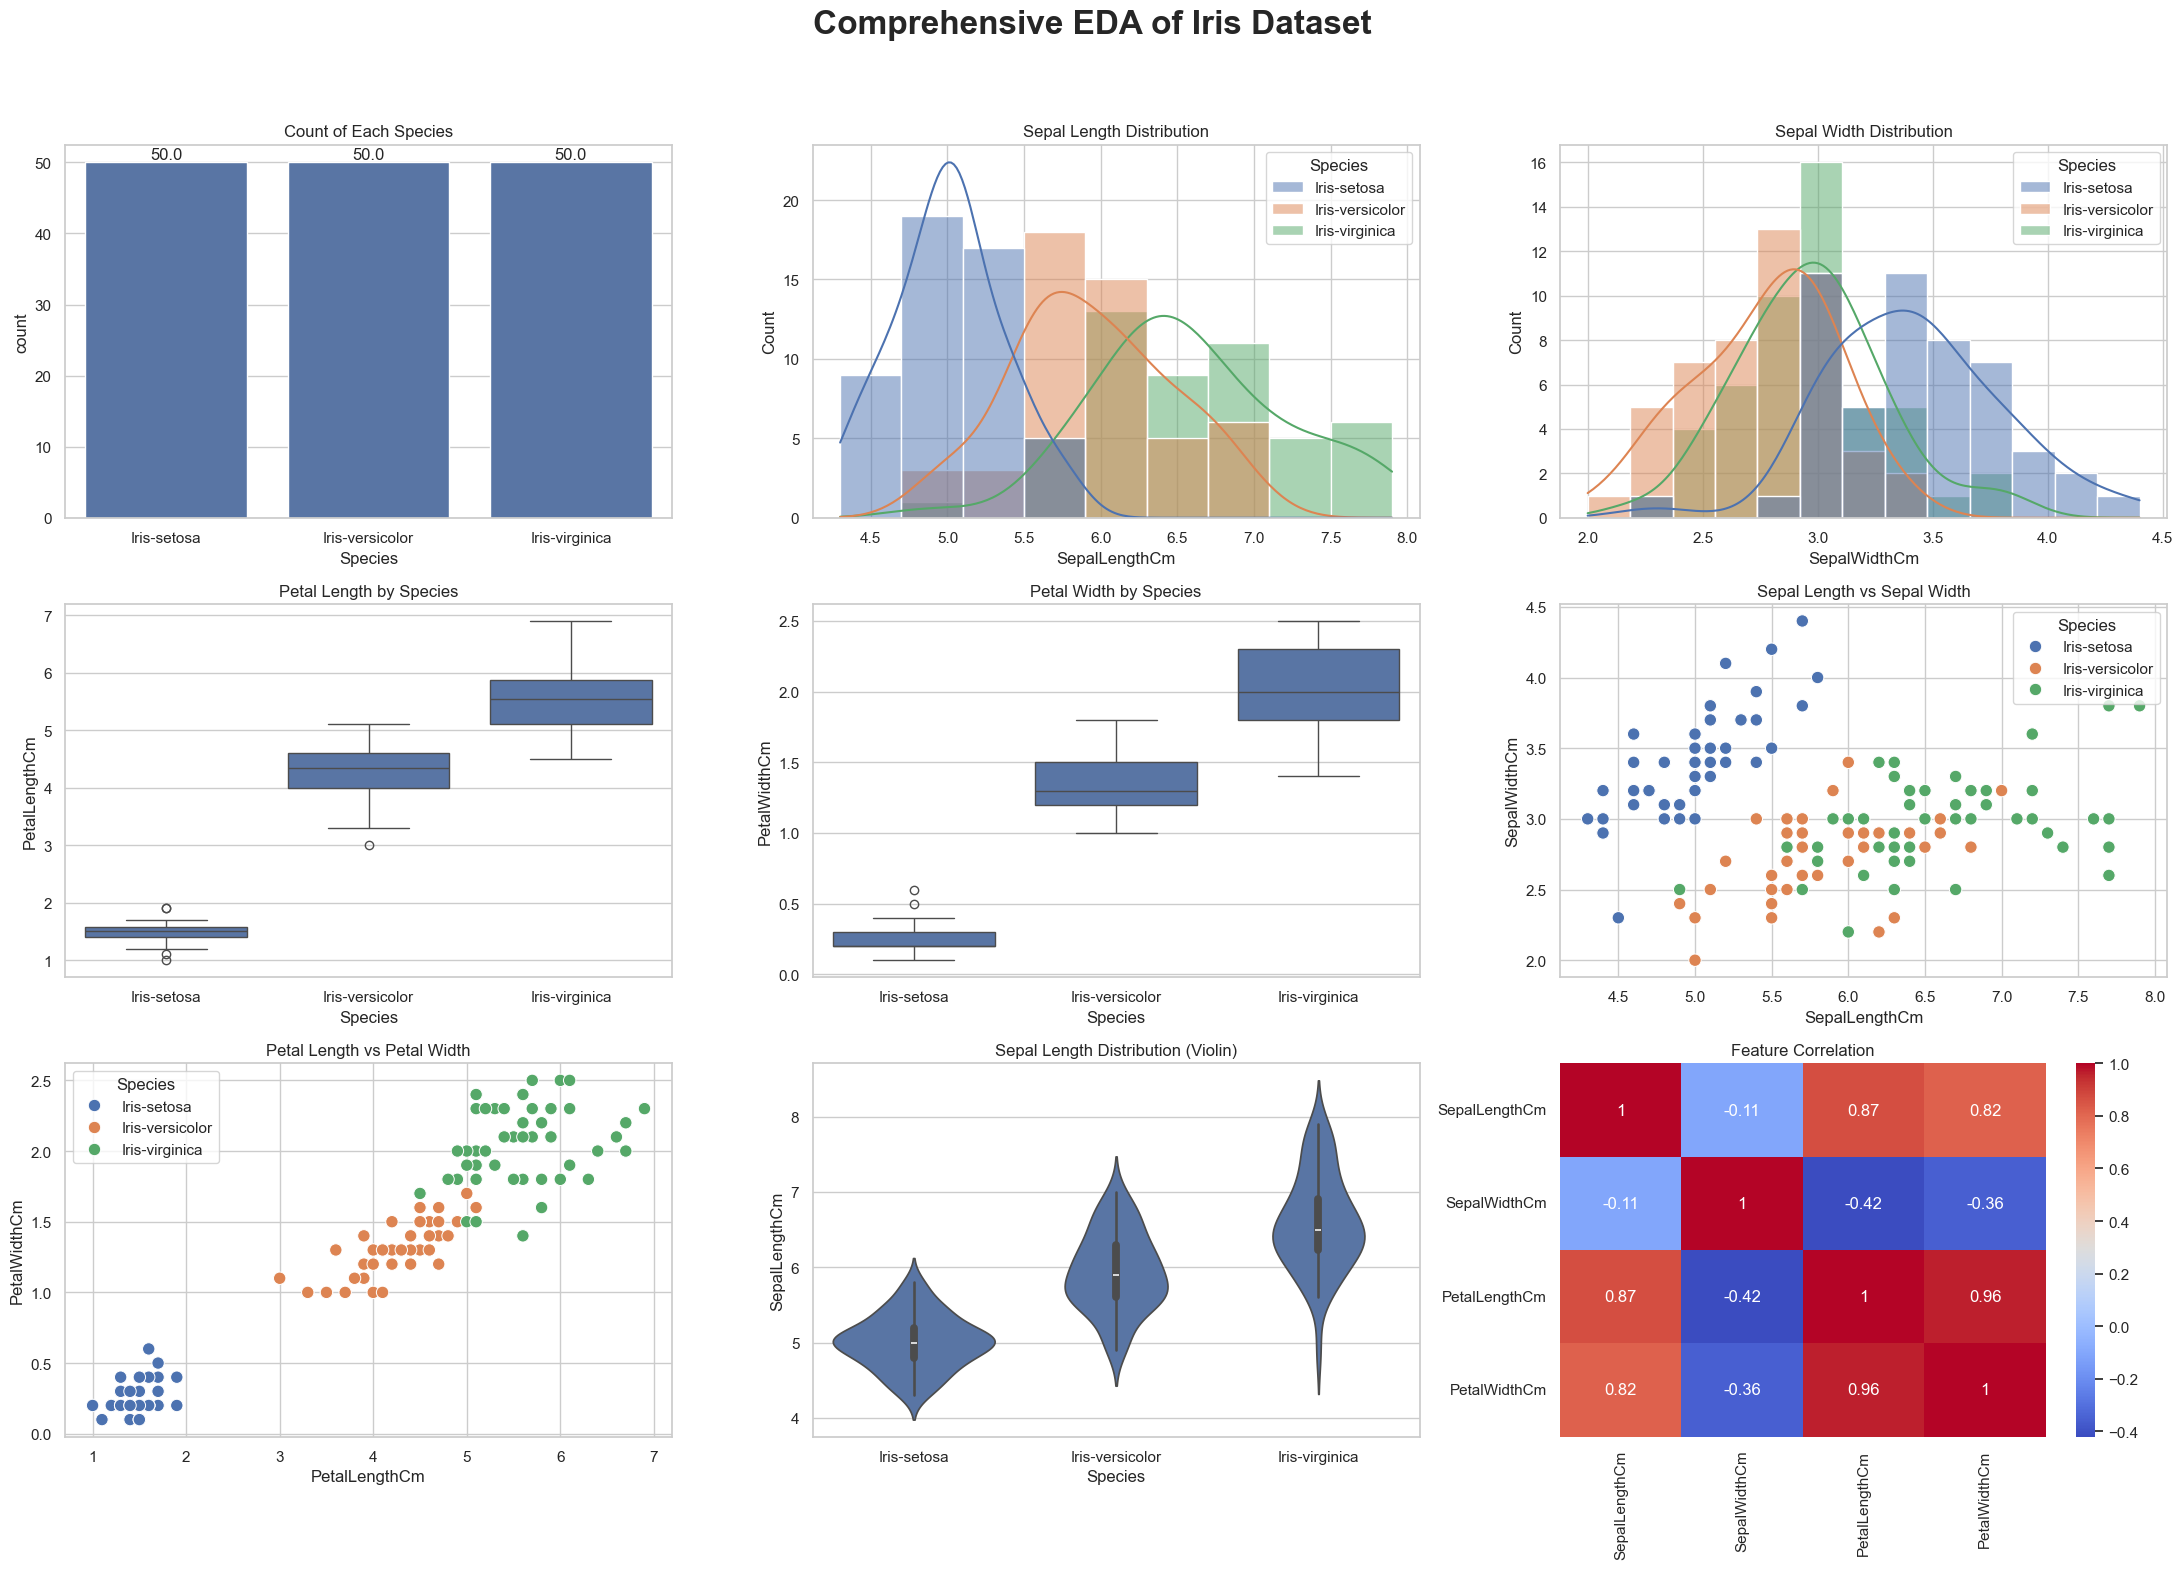

In [56]:
sns.set(style="whitegrid")

# Create 3x3 subplot
fig, axes = plt.subplots(3, 3, figsize=(22, 16))
fig.suptitle('Comprehensive EDA of Iris Dataset', fontsize=24, fontweight='bold')

# ---------------- Row 1 ----------------
# 1. Count of each species with values
sns.countplot(x='Species', data=df, ax=axes[0,0])
for p in axes[0,0].patches:
    axes[0,0].annotate(f'{p.get_height()}', (p.get_x()+p.get_width()/2., p.get_height()),
                        ha='center', va='bottom', fontsize=12)
axes[0,0].set_title('Count of Each Species')

# 2. Sepal Length distribution by Species (hist + KDE)
sns.histplot(data=df, x='SepalLengthCm', hue='Species', kde=True, ax=axes[0,1])
axes[0,1].set_title('Sepal Length Distribution')

# 3. Sepal Width distribution by Species (hist + KDE)
sns.histplot(data=df, x='SepalWidthCm', hue='Species', kde=True, ax=axes[0,2])
axes[0,2].set_title('Sepal Width Distribution')

# ---------------- Row 2 ----------------
# 4. Petal Length boxplot
sns.boxplot(x='Species', y='PetalLengthCm', data=df, ax=axes[1,0])
axes[1,0].set_title('Petal Length by Species')

# 5. Petal Width boxplot
sns.boxplot(x='Species', y='PetalWidthCm', data=df, ax=axes[1,1])
axes[1,1].set_title('Petal Width by Species')

# 6. Scatter plot Sepal features
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', hue='Species', data=df, ax=axes[1,2], s=80)
axes[1,2].set_title('Sepal Length vs Sepal Width')

# ---------------- Row 3 ----------------
# 7. Scatter plot Petal features
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm', hue='Species', data=df, ax=axes[2,0], s=80)
axes[2,0].set_title('Petal Length vs Petal Width')

# 8. Violin plot Sepal Length
sns.violinplot(x='Species', y='SepalLengthCm', data=df, ax=axes[2,1])
axes[2,1].set_title('Sepal Length Distribution (Violin)')

# 9. Correlation heatmap
sns.heatmap(df.iloc[:, :-1].corr(), annot=True, cmap='coolwarm', ax=axes[2,2])
axes[2,2].set_title('Feature Correlation')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])  # leave space for main title
plt.show()


Features of this combined chart:

3 rows × 3 columns

Histograms for Sepal features

Boxplots for Petal features

Scatter plots for feature relationships

Violin plot for Sepal length distribution

Correlation heatmap

Annotated bar chart for species counts

Main title at the top

# Iris Dataset - Exploratory Data Analysis (EDA) Charts

**Top Left:** **Count of Each Species**  
A bar chart showing the total number of samples for each Iris species: *Iris-setosa*, *Iris-versicolor*, and *Iris-virginica*. Each species has 50 samples, illustrating balanced data.

**Top Middle:** **Sepal Length Distribution**  
A histogram with KDE overlay showing the distribution of sepal lengths (cm) for all samples, colored by species. Highlights differences in sepal length across species.

**Top Right:** **Sepal Width Distribution**  
A histogram with KDE overlay showing the spread of sepal widths (cm) for all samples, separated by species. Highlights differences in sepal width among species.

**Middle Left:** **Petal Length by Species**  
A box plot summarizing petal length (cm) — median, quartiles, range, and outliers — for each species. Allows comparison of central tendency and spread.

**Middle Center:** **Petal Width by Species**  
A box plot illustrating the distribution of petal width (cm) for each species, showing differences in spread and median values.

**Middle Right:** **Sepal Length vs Sepal Width**  
A scatter plot showing the relationship between sepal length and sepal width, with points colored by species. Helps visualize species separation.

**Bottom Left:** **Petal Length vs Petal Width**  
A scatter plot showing the relationship between petal length and petal width, colored by species. Clearly shows strong separability between species.

**Bottom Center:** **Sepal Length Distribution (Violin)**  
A violin plot presenting the density distribution of sepal length for each species. Combines box plot and KDE features to show data distribution.

**Bottom Right:** **Feature Correlation**  
A heatmap showing Pearson correlation coefficients between all numeric features (SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm). Highlights strength and direction of linear relationships.


## Ready for Iris Flower Classification !

Prepare features and target

In [57]:
# Features and target
X = df.drop('Species', axis=1)  # all numeric features
y = df['Species']               # target variable

# Encode target labels if needed (optional, some classifiers can handle strings)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)  # Iris-setosa->0, Iris-versicolor->1, Iris-virginica->2

Split dataset into training and test sets

In [58]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

Training with Random Forest Classifier (good baseline for small datasets):

In [59]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


Making predictions

In [60]:
y_pred = rf.predict(X_test)

Evaluating the model

Accuracy: 0.9

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.82      0.90      0.86        10
 Iris-virginica       0.89      0.80      0.84        10

       accuracy                           0.90        30
      macro avg       0.90      0.90      0.90        30
   weighted avg       0.90      0.90      0.90        30



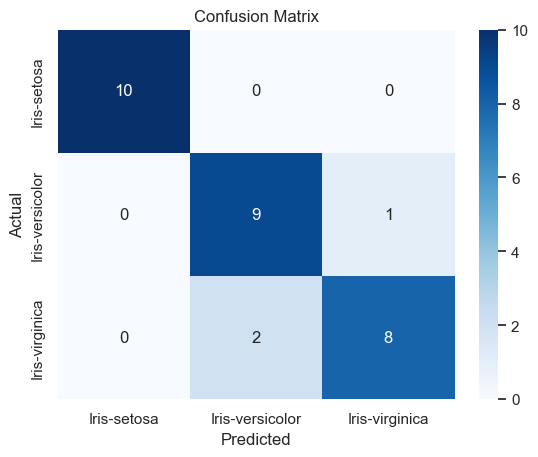

In [61]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Interpretation of the results:

Iris-setosa: Perfectly classified (precision, recall, f1-score = 1.0) 

Iris-versicolor: Mostly correct; a few misclassifications lowered precision to 0.82

Iris-virginica: Slightly under-predicted (recall 0.80), causing f1-score 0.84

Overall:

Accuracy: 0.90 → 90% of flowers were correctly classified.

Macro avg & weighted avg: 0.90 → balanced performance across classes.

# Iris Classification Evaluation 

C:\Users\sumai\AppData\Local\Temp\ipykernel_4264\1223403270.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances.values, y=feature_importances.index, palette='viridis', ax=axes[0,2])


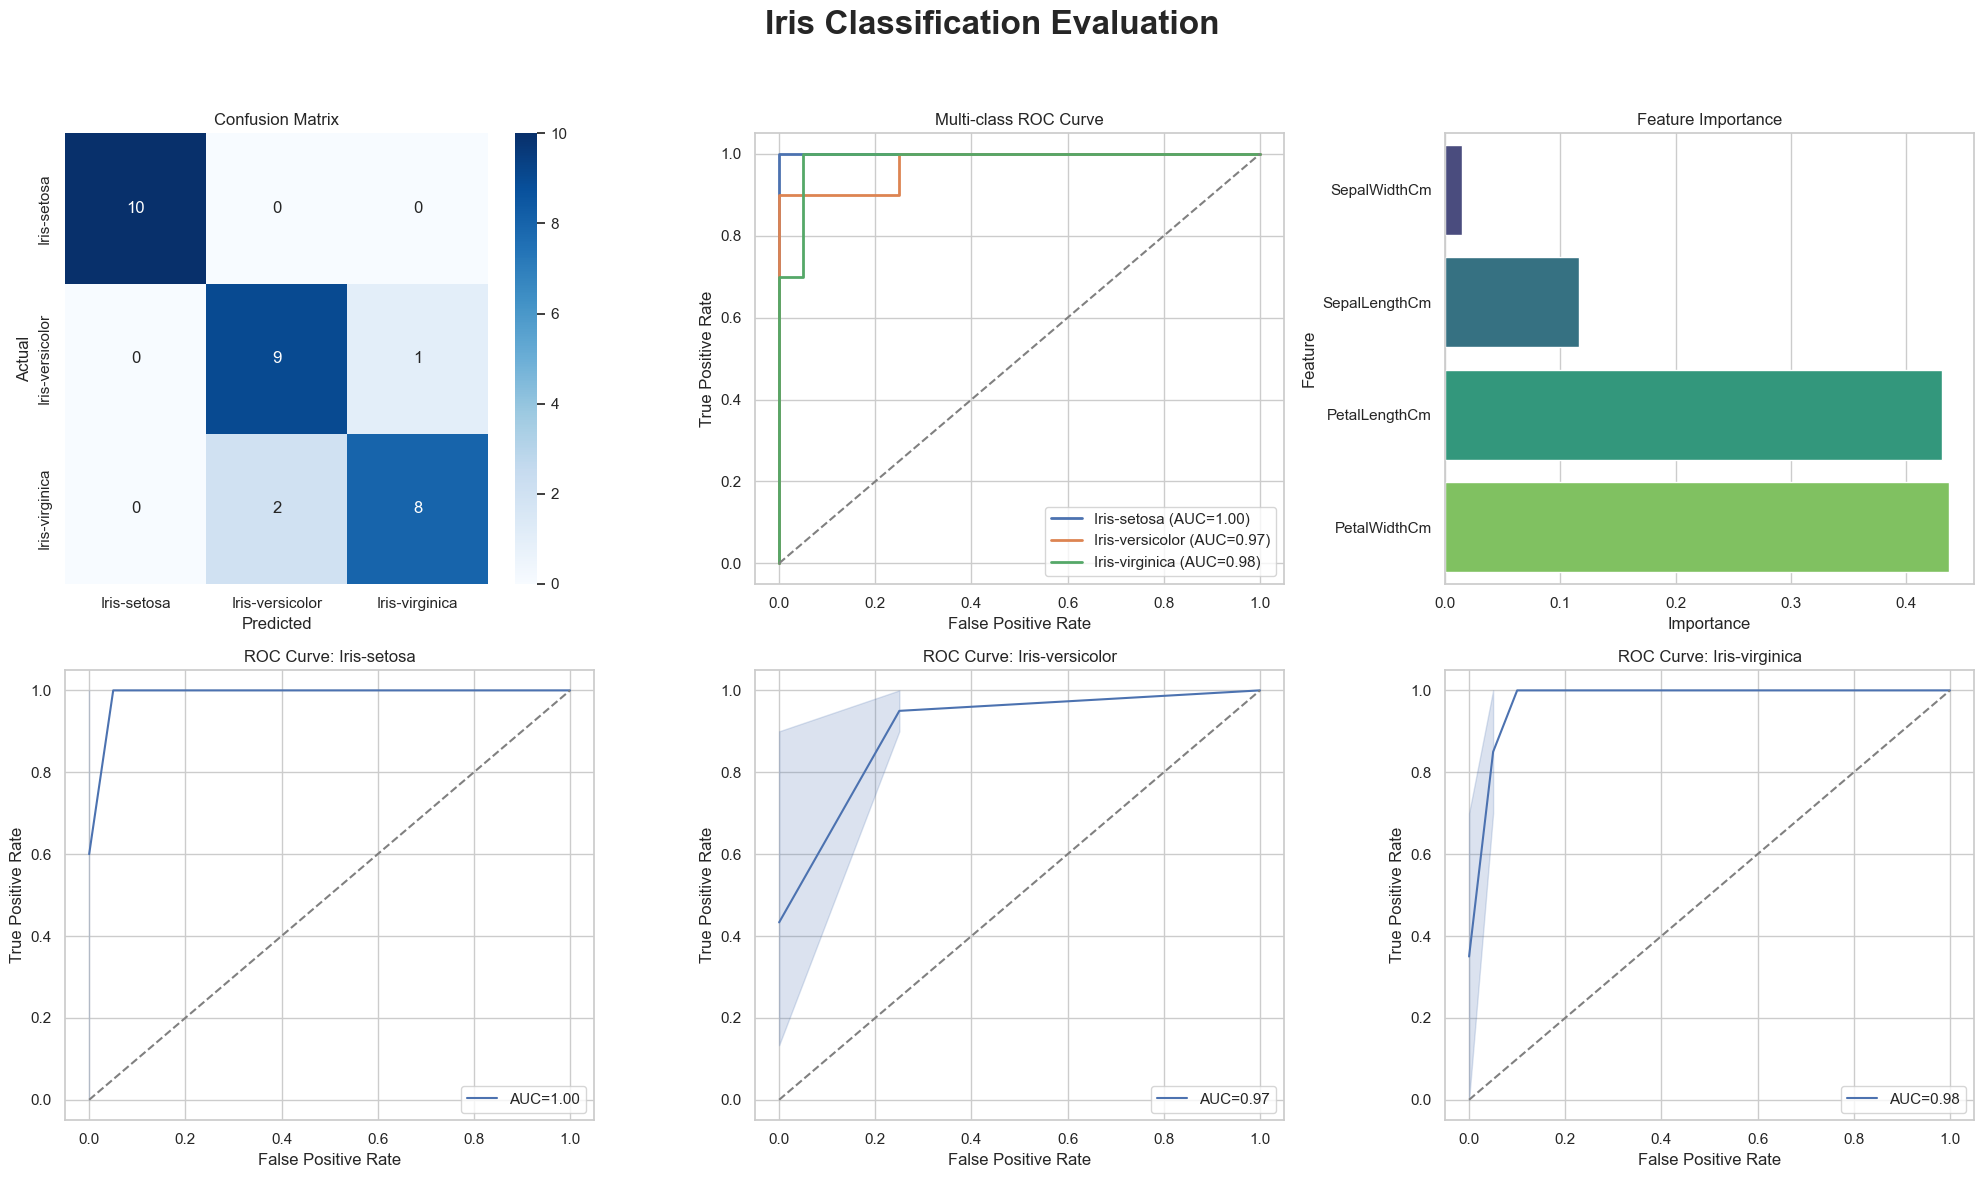

In [62]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize

# Predictions and probabilities
y_pred = rf.predict(X_test)
y_score = rf.predict_proba(X_test)
y_test_bin = label_binarize(y_test, classes=[0,1,2])  # One-hot for ROC

# Feature importance from Random Forest
feature_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=True)

# Create figure: 2 rows, 3 columns
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle('Iris Classification Evaluation', fontsize=24, fontweight='bold')

# ----------- Confusion Matrix (Row1, Col1) -----------
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_, ax=axes[0,0])
axes[0,0].set_xlabel('Predicted')
axes[0,0].set_ylabel('Actual')
axes[0,0].set_title('Confusion Matrix')

# ----------- Multi-class ROC curve (Row1, Col2) -----------
for i, class_name in enumerate(le.classes_):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    axes[0,1].plot(fpr, tpr, lw=2, label=f'{class_name} (AUC={roc_auc:.2f})')
axes[0,1].plot([0,1],[0,1], color='gray', linestyle='--')
axes[0,1].set_title('Multi-class ROC Curve')
axes[0,1].set_xlabel('False Positive Rate')
axes[0,1].set_ylabel('True Positive Rate')
axes[0,1].legend(loc='lower right')

# ----------- Feature Importance (Row1, Col3) -----------
sns.barplot(x=feature_importances.values, y=feature_importances.index, palette='viridis', ax=axes[0,2])
axes[0,2].set_title('Feature Importance')
axes[0,2].set_xlabel('Importance')
axes[0,2].set_ylabel('Feature')

# ----------- Individual ROC curves (Row2) -----------
for i, class_name in enumerate(le.classes_):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    sns.lineplot(x=fpr, y=tpr, ax=axes[1,i], label=f'AUC={auc(fpr, tpr):.2f}')
    axes[1,i].plot([0,1],[0,1], color='gray', linestyle='--')
    axes[1,i].set_title(f'ROC Curve: {class_name}')
    axes[1,i].set_xlabel('False Positive Rate')
    axes[1,i].set_ylabel('True Positive Rate')
    axes[1,i].legend(loc='lower right')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


# Iris Classification - Model Evaluation Charts

**Top Left:** **Confusion Matrix**  
A heatmap showing classification accuracy by comparing the Actual species labels (rows) against the model's Predicted species labels (columns). The diagonal cells represent correct classifications.

**Top Middle:** **Multi-class ROC Curve**  
The Receiver Operating Characteristic (ROC) curve for all three species, plotting the True Positive Rate vs. the False Positive Rate at various threshold settings. The Area Under the Curve (AUC) values indicate the overall discriminatory power of the model for each class.

**Top Right:** **Feature Importance**  
A bar chart displaying the relative importance of each of the four features (*SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm*) in the model's classification decisions. Petal Length and Petal Width are the most influential features.

**Bottom Left:** **ROC Curve: Iris-setosa**  
The individual ROC curve for the *Iris-setosa* class, showing an AUC of 1.00, indicating perfect separation and classification for this species.

**Bottom Center:** **ROC Curve: Iris-versicolor**  
The individual ROC curve for the *Iris-versicolor* class, showing an AUC of 0.97, indicating very high classification performance. A shaded area can represent confidence intervals.

**Bottom Right:** **ROC Curve: Iris-virginica**  
The individual ROC curve for the *Iris-virginica* class, showing an AUC of 0.98, indicating excellent performance in distinguishing this species from the others.


# So Iris Flower Classification is done Succesfully by Random Forest Model !